# ORIE 5580/5581: Homework 2
## Bowen Gao (bg453), Soobin Lee (dyl44)

## 1.
### (a)

The exact probability that a random point $(X, Y)$ falls inside the circle is $P = \frac{\pi}{4}$. An estimate of $\pi$ is $\widehat{\pi}$ = $\frac{4N_{circle}}{n}$. 

Any point $Z_i(x_i, y_i)(i = 1, 2,...,n)$ generated follows a Bernoulli random variable with parameter $p = \frac{\pi}{4}$.
Therefore, its sum $\sum_{i=1}^{n}Z_i = N_{circle}$ follows a binomial distribution with parameters $n$ and $p = \frac{\pi}{4}$.  Its probability mass function is:  

$$
P(N_{circle} = i) = \binom{n}{i}\bigg(\frac{\pi}{4}\bigg)^{i}\bigg(1-\frac{\pi}{4}\bigg)^{n-i},　i = 1, 2,...,n.
$$




### (b)
According to Central Limit Theorem, since $Z_i$ are i.i.d., 
$$
\frac{1}{n}\sum_{i=1}^{n}Z_i \stackrel{D}{\approx} E(Z_i) + \frac{\sigma}{\sqrt{n}}N(0,1).
$$
Thus,
$$
\widehat{\pi} = \frac{4N_{circle}}{n} \stackrel{D}{\approx} 4p + \frac{4\sqrt{p(1-p)}}{\sqrt{n}}N(0,1).
$$

Theoretically, for confidence level $\alpha$ and half-width $\ell$, the number of samples that should be generated is:  

$$
N = \bigg\lceil\frac{z^2_{\alpha/2}\widetilde{s}^2_k}{\ell^2}\bigg\rceil,
$$
where $\widetilde{s}^2_k$ is the unbiased estimation of $\sigma^2$.  

For this problem, $\alpha$ is $10\%$. Since we already know the distribution of $Z_i$, we can use the variance of $4Z_i$, which is $16p(1-p)$. To achieve two digits of precision, the difference between the right bound and the left bound of confidence interval should be less than $0.01$. Therefore, the half-width of the confidence interval should be less than $0.005$.  

In [6]:
import numpy as np
import scipy.stats

p = np.pi / 4
var = 16 * p * (1 - p)
ell = 0.005
(np.sqrt(var) * scipy.stats.norm.ppf(0.05) / ell) ** 2

291848.72702151304

Thus, we should generate at least $291849$ random points in order to obtain an estimate of $\pi$ that is accurate to two decimal places with $90\%$ confidence. 

### (c)

Using our simulation from Homework 1, we obtain an estimate of $\pi$ based on the number of points we determined in part (b). According to the output below, the estimate of $\pi$ is approximately 3.14 and the $90\%$ fixed-sample confidence interval is (3.13, 3.14).

In [7]:
# import numpy as np
# import scipy.stats

n = 291849

x = np.random.uniform(-1, 1, [n,1])
y = np.random.uniform(-1, 1, [n,1])
z = []

for i in range(n): 
    if (x[i] ** 2 + y[i] ** 2) <= 1:
        z.append(1)
    else:
        z.append(0)
p0 = sum(z) / (n + 0.)
estimated_pi = 4. * p0
print ("The estimate of pi is", estimated_pi)

# p = estimated_pi / 4.
# var1 = 16. * p * (1-p)

var2 = 16. * np.var(z, ddof = 1)
LB = estimated_pi - scipy.stats.norm.ppf(0.95) * np.sqrt(var2 / n)
RB = estimated_pi + scipy.stats.norm.ppf(0.95) * np.sqrt(var2 / n)
print ("The 90% fixed-sample confidence interval is ", LB, RB)

The estimate of pi is 3.14173425298699
The 90% fixed-sample confidence interval is  3.1367345465 3.14673395948


## 2.
### (a)

For a range of values of $n$ between 10 and 10,000, we perform 30 replications of the Buffon needle experience. For each value of $n$ we test, we plot the average of the 30 estimates of $\pi$ and a $95\%$ confidence interval for the expected value of $\widehat{\pi}_n$. 

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
def buffon(N, length, dist, seed = -1):
    # N = number of throws 
    # length = length of match
    # dist = distance between lines
    # seed = seed for random number generator
    
    # Visualize parallel vertical lines
    
    if seed == -1:
        xcent = np.random.uniform(0, dist / 2.0, N) # random x-coordinate of center point
        theta = np.random.uniform(0, math.pi / 2, N) # random angle
    else:
        np.random.seed(seed)
        xcent = np.random.uniform(0, dist / 2.0, N) # random x-coordinate of center point
        theta = np.random.uniform(0, math.pi / 2, N) # random angle

    xtip_l  = xcent - (length / 2.0) * np.cos(theta) # generate left endpoint
    pihatN = 2.0 * length * N / (dist * (sum(xtip_l < 0)))     
    return pihatN

In [31]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

r = 30
avg_estimate = np.zeros(1000)
var_estimate = np.zeros(1000)

for j in range(1000):
    n = 10 + 10 * j
    estimate = np.zeros(r)
    for i in range(r):
        estimate[i] = buffon(n, 1, 1)
    avg_estimate[j] = np.mean(estimate)
    var_estimate[j] = np.var(estimate) * 30. / 29.

In [32]:
n_range = range(10, 10010, 10)

# plt.axhline(y = np.pi, color = 'red')
# plt.plot(n_range, avg_estimate);

<Container object of 3 artists>

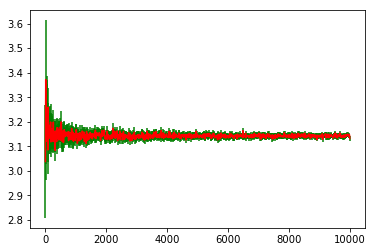

In [33]:
plt.errorbar(n_range, avg_estimate, color = 'red', yerr = scipy.stats.norm.ppf(0.975) * np.sqrt(var_estimate / r), ecolor = 'green')

### (b)
In the plot in part (a), we notice that $\widehat{\pi}_n$ tends to underestimate $\pi$. According to Jensen's Inequality, $E(f(x))\leq f(E(x))$ if $f(x)$ is convex. In this problem, we used $\frac{N_{cross}}{n}$ to estimate $\frac{2}{\widehat{\pi}}$ and took the inverse times two to get $\widehat{\pi}$. Thus, the $f(x)$ here is $\frac{2}{x}$ so we can apply Jesen's Inequality:
$$
f(E(x)) = \frac{2}{E(x)} = \frac{2}{E(P_{cross})} = \frac{2}{\frac{N_{cross}}{n}} = \frac{2n}{N_{cross}} = \widehat{\pi}_n\leq E(f(x)) = E\bigg(\frac{2}{x}\bigg) = E\bigg(\frac{2}{P_{cross}}\bigg)=\pi.
$$

## 3.
### (a)

In this problem, we use simulation to compute the expected number of acceptable wafers in a batch of $m = 500$ wafers. According to the output, the $95\%$ confidence interval for $m$ that is accurate to one decimal place is as follows:

In [3]:
import numpy as np
import scipy.stats

a = 0.92
b = 0.96
ell = 0.05
x = np.random.uniform(0.92, 0.96, 100)
mean_x = np.mean(x)
var_x = np.var(x, ddof=1)
n = np.ceil((500. * np.sqrt(var_x) * scipy.stats.norm.ppf(0.975) / ell) ** 2)
print("n =",n)

p = np.random.uniform(a, b, int(n))
m = 500. * np.mean(p) 
print (m)
sim_mean = np.mean(p)
sim_var = np.var(p, ddof = 1)
LB = 500. * sim_mean - 500. * np.sqrt(sim_var / n) * scipy.stats.norm.ppf(0.975)
RB = 500. * sim_mean + 500. * np.sqrt(sim_var / n) * scipy.stats.norm.ppf(0.975)
print (LB, RB)

n = 48322.0
470.010877034
469.959303544 470.062450525


### (b)


According to the output below, the $95\%$ confidence interval for the probability is as follows:

In [5]:
import numpy as np
import scipy.stats

a = 0.92
b = 0.96
x = np.random.uniform(0.92, 0.96, 100)
y = (x >= 0.95)
mean_y = np.mean(y)
var_y = np.var(y, ddof = 1)
ell = 0.05
n = np.ceil((np.sqrt(var_y) * scipy.stats.norm.ppf(0.975) / ell) ** 2)
print("n =", n)

p = np.random.uniform(a, b, int(n))
sample = (p >= 0.95)
sim_mean = np.mean(sample)
#print(sim_mean)
sim_var = np.var(sample, ddof = 1)
#sim_var2 = sim_mean*(1-sim_mean)
#print(sim_var, sim_var2)
LB = sim_mean - scipy.stats.norm.ppf(0.975) * np.sqrt(sim_var / n)
RB = sim_mean + scipy.stats.norm.ppf(0.975) * np.sqrt(sim_var / n)
print (LB, RB)

n = 306.0
0.236783732799 0.338379665894


## 4.
### (a)
The random variable $X$ follows a binomial distribution with parameters $n = 104$ and $p = \frac{19}{20}$.  


### (b)

Given that the hotel has only 100 rooms, the probability that there will not be enough rooms for the booked guests who show up by 10PM is 

\begin{align*}
P(X > 100) &= P(X = 101) + P(X = 102) + P(X = 103) + P(X = 104) \\
&= \dbinom{104}{101} (0.95)^{101}(0.05)^{3} + \cdots + \dbinom{104}{104}(0.95)^{104}(0.05)^{0} \\
&\approx 0.231.
\end{align*}

The code to compute this probability is shown below. 

In [25]:
from scipy.special import comb

n = 104
p = 19./20.
sum = 0.
for i in range(101, 105):
    sum = sum + comb(n, i) * (p ** i) * ((1 - p) ** (n - i))
print (sum)

0.230795143163


### (c)
We know that the expected number of guests is $E(X) = np = \frac{19}{20}n.$ 

Case I:

If $\frac{19}{20}n \leq 100$, then $n \leq \frac{2000}{19}$ and the profit is $P = 50 (0.95) n \leq \frac{50 \cdot 2000}{19}.$ We find that $50(0.95)(105) \approx 4987.5$ and so $n = 105.$

Case II:

Similarly, if $\frac{19}{20}n > 100$, then $n > \frac{2000}{19}$. We find that for $n = 106$, the profit is about $4939.3$. 

Since the profit in case II is lower than that of case I, the number of rooms that should be sold to maximize the expected profit is $n = 105$. 